# <font color='#3cb371'>**Titanic ML Competition**</font> 

In [71]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import classification_report

In [72]:
# Loading Dataset
training = pd.read_csv('Titanic_Train.csv')
test = pd.read_csv('Titanic_Test.csv')

test['Survived'] = np.NaN
titanic_all_data = pd.concat([training, test])

In [73]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
titanic_all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
# Checking number of observations for training and test data
print(f'Training data shape: {training.shape}')
print(f'Test data shape: {test.shape}')

Training data shape: (891, 12)
Test data shape: (418, 12)


In [76]:
# Checking column types and non-missing observations of columns
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
# Checking column types and non-missing observations of columns
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     0 non-null      float64
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [78]:
# Check the number of missing values for each column
missing = pd.concat([training.isnull().sum(), 100 * training.isnull().mean()], axis=1)
missing.columns=['MissingCount', 'MissingPercentage']
missing.sort_values(by='MissingCount', inplace=True)
missing

,MissingCount,MissingPercentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Embarked,2,0.224467


In [79]:
# Drop Cabin, Ticket and Name variables from training data
training.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [80]:
# Get median age by sex
median_age_by_sex = training.groupby('Sex')['Age'].median()
median_age_by_sex

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [81]:
# Replace missing values of `Age` with median age for each sex
training.loc[(training["Sex"] == "male") & (training["Age"].isnull()),  "Age"] = 29
training.loc[(training["Sex"] == "female") & (training["Age"].isnull()),  "Age"] = 27

# Drop the 2 observations with missing values for 'Embarked'
training.drop(training[training["Embarked"].isnull()].index, inplace=True)

# Check again for missing values
training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [82]:
# Create boolean Series for duplicate observations
duplicates = training.duplicated()

# Check if there are any duplicates
any_duplicates = duplicates.any()
print(f"Are there any duplicates? {any_duplicates}")

Are there any duplicates? False


### Exploratory Data Analysis

In [83]:
# Drop 'PassengerId' since it cannot be used in analysis
training.drop(columns=['PassengerId'], inplace=True)

# Get summary statistics of numemric variables
training.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.395017,12.984264,0.42,22.0000,29.0000,35.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


About 38% of the training sample are survivors. The average age is 29 years, but the minimum age is 0.42. This might be the age of a child who was a few months old at the time. We will need further information to correctly decide. There seems to have been very few parents with their children on board since the 75th percentile is 0, telling us that 75% of passengers had no children on board. There were also few siblings and spouses, since the 75th percentile is 1, only 25% of the training sample had more than 1 sibling or spouse on board. 

High-priced ticket holders were also few: 75% of ticket prices were below 31 dollars, but the maximum ticket price is 512 dollars. Given these statistics, we expect `SibSp`, `Parch`, and `Fare` to be right skewed.

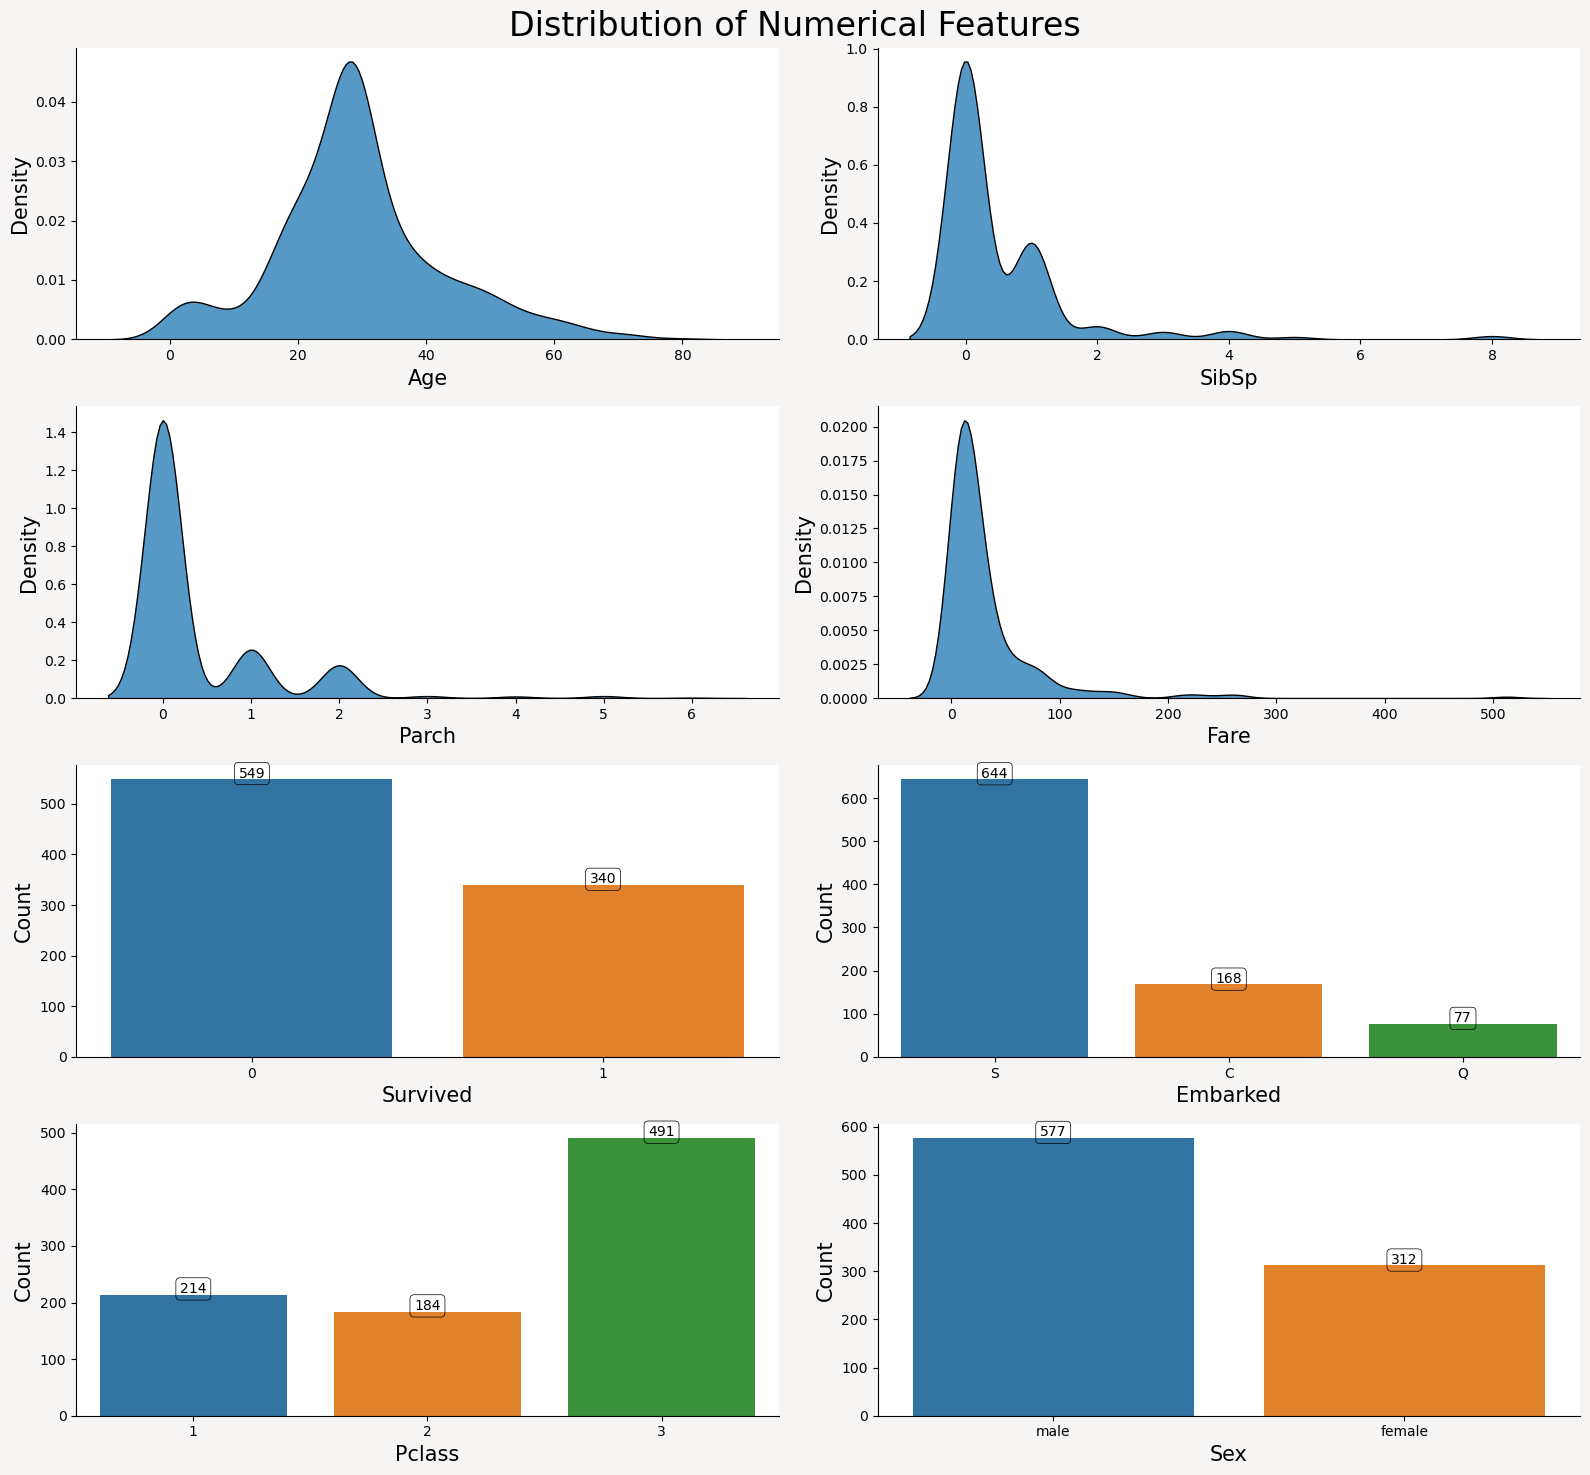

In [84]:
# Visualize features
feats = ['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Embarked', 'Pclass', 'Sex']

L = len(feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(16, 15), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.97)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, col in enumerate(feats):
    if col not in ['Survived', 'Embarked', 'Pclass', 'Sex']:
        # Use KDE plot for all numerical features except 'num_major_vessels'
        sns.kdeplot(data=training, x=col, multiple='stack', ax=axs[i])
    else:
        # Use countplot for 'pH'
        sns.countplot(data=training, x=col, ax=axs[i])
        # Add annotations to the countplot
        for p in axs[i].patches:
            height = p.get_height()
            axs[i].text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), ha='center',
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    axs[i].set_xlabel(col, fontsize=15)
    axs[i].set_ylabel('Density' if col not in ['Survived', 'Embarked', 'Pclass', 'Sex'] else 'Count', fontsize=15)
    sns.despine(right=True, ax=axs[i])

# Remove any unused axes if num_feats is odd
if L % 2 != 0:
    fig.delaxes(axs[-1])

plt.suptitle('Distribution of Numerical Features', fontsize=24)
plt.tight_layout()
plt.show()

The right skew of `SibSp`, `Parch`, and `Fare` is confirmed by the graphs. We also see that there were more people who died than survivors, and  Class 3 passengers than Classes 1 and 2.

In [85]:
# Proportion of survivors by Sex
training.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [86]:
# Proportion of survivors by ticket class
training.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [87]:
# Proportion of survivors by port of embarkation
training.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

We see from the above that a lot more females survived than males. While 74% of female passenger survived, only 18% of male passengers survived. Also, even though there were more Class 3 ticket holders as shown in the graph above, there were a lot more survivors with a Class 1 ticket than with a Class 3 ticket. Furthermore, there were more survivors from Cherbourg than from Queenstown and Southampton.

In [88]:
training.groupby('Survived')[['Age', 'SibSp', 'Parch', 'Fare']].mean()

,Age,SibSp,Parch,Fare
Survived,,,,
0,30.193989,0.553734,0.329690,22.117887
1,28.104912,0.476471,0.467647,48.209498


Those who survived were, on average, younger and also paid a much higher fare. The higher fare probably meant that they were in a safer location of the ship.

In [89]:
# Creating correlation matrix
corr = training.corr(numeric_only=True)

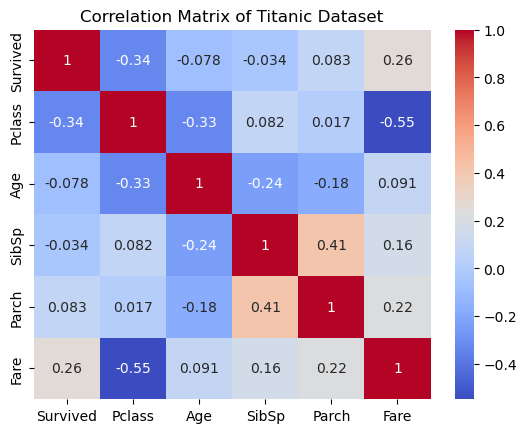

In [90]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

## Modelling

### Cross Validation

In [91]:
# import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

In [92]:
# Encoding categorical variables
training = pd.get_dummies(training, columns=['Sex', 'Embarked'], drop_first=True)
training.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [93]:
# Splitting the dataset into features and target variable
X_train = training.drop(['Survived'], axis=1)
y = training['Survived']

In [94]:
# Decision Tree
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

# fit the model
clf_gini.fit(X_train, y)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [95]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=2100, penalty='l2', C=1.0, solver='liblinear')

# Fitting the model to the training data
lr_model.fit(X_train, y)

LogisticRegression(max_iter=2100, solver='liblinear')

In [96]:
# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y)

KNeighborsClassifier(n_neighbors=7)

In [97]:
# Initializing the SVM classifier
svm = SVC(C=2, kernel='rbf')

# Fitting the classifier to the training data
svm.fit(X_train, y)

SVC(C=2)

### Cross Validation with Decision Tree Model

In [98]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Define the scoring metric for cross-validation
scoring = 'neg_root_mean_squared_error' 

# Perform cross-validation
scores_dt = cross_val_score(clf_gini, X_train, y, scoring=scoring, cv=10)

# Convert scores to positive
scores_dt = -scores_dt

# Calculate the mean RMSE across all cross-validation folds
mean_rmse_cv = scores_dt.mean()
print(f'Mean Cross-validated RMSE: {mean_rmse_cv}')

# Get cross-validated predictions on the training data
predictions_cv = cross_val_predict(clf_gini, X_train, y, cv=10)

# Get root mean squared error of the estimation
mse_cross_val = mean_squared_error(y, predictions_cv)
rmse_cross_val = np.sqrt(mse_cross_val)

print(f'Cross-validated RMSE: {rmse_cross_val}')

Mean Cross-validated RMSE: 0.4409213394493097
Cross-validated RMSE: 0.4449441010883989


### Cross Validation with Logistic Regression

In [99]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Define the scoring metric for cross-validation
scoring = 'neg_root_mean_squared_error' 

# Perform cross-validation
scores_lr = cross_val_score(lr_model, X_train, y, scoring=scoring, cv=10)

# Convert scores to positive
scores_lr = -scores_lr

# Calculate the mean RMSE across all cross-validation folds
mean_rmse_cv = scores_lr.mean()
print(f'Mean Cross-validated RMSE: {mean_rmse_cv}')

# Get cross-validated predictions on the training data
predictions_cv = cross_val_predict(lr_model, X_train, y, cv=10)

# Get root mean squared error of the estimation
mse_cross_val = mean_squared_error(y, predictions_cv)
rmse_cross_val = np.sqrt(mse_cross_val)

print(f'Cross-validated RMSE: {rmse_cross_val}')

Mean Cross-validated RMSE: 0.4540812992920067
Cross-validated RMSE: 0.4549440935257548


### Cross Validation with k-Nearest Neighbors

In [100]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Define the scoring metric for cross-validation
scoring = 'neg_root_mean_squared_error' 

# Perform cross-validation
scores_knn = cross_val_score(knn, X_train, y, scoring=scoring, cv=10)

# Convert scores to positive
scores_knn = -scores_knn

# Calculate the mean RMSE across all cross-validation folds
mean_rmse_cv = scores_knn.mean()
print(f'Mean Cross-validated RMSE: {mean_rmse_cv}')

# Get cross-validated predictions on the training data
predictions_cv = cross_val_predict(knn, X_train, y, cv=10)

# Get root mean squared error of the estimation
mse_cross_val = mean_squared_error(y, predictions_cv)
rmse_cross_val = np.sqrt(mse_cross_val)

print(f'Cross-validated RMSE: {rmse_cross_val}')

Mean Cross-validated RMSE: 0.5389130265278611
Cross-validated RMSE: 0.5397578926492556


### Cross Validation with Support Vector Machines

In [101]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Define the scoring metric for cross-validation
scoring = 'neg_root_mean_squared_error' 

# Perform cross-validation
scores_svm = cross_val_score(svm, X_train, y, scoring=scoring, cv=10)

# Convert scores to positive
scores_svm = -scores_svm

# Calculate the mean RMSE across all cross-validation folds
mean_rmse_cv = scores_svm.mean()
print(f'Mean Cross-validated RMSE: {mean_rmse_cv}')

# Get cross-validated predictions on the training data
predictions_cv = cross_val_predict(svm, X_train, y, cv=5)

# Get root mean squared error of the estimation
mse_cross_val = mean_squared_error(y, predictions_cv)
rmse_cross_val = np.sqrt(mse_cross_val)

print(f'Cross-validated RMSE: {rmse_cross_val}')

Mean Cross-validated RMSE: 0.559665582554937
Cross-validated RMSE: 0.573113376769528


## Predicting Survival with Test Data

In [102]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [103]:
# Drop Cabin and Name variables from training data
test.drop(columns=['Cabin', 'Name', 'Survived', 'PassengerId', 'Ticket'], inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


<Axes: >

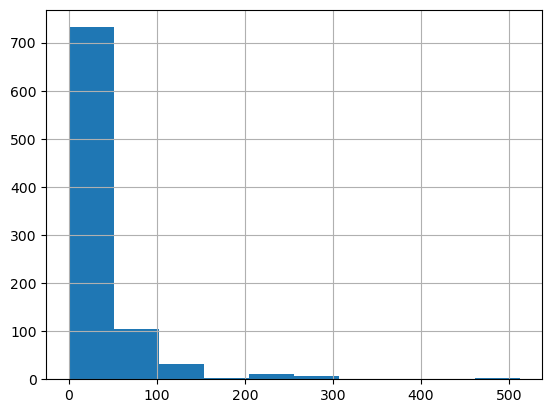

In [104]:
# Draw histogram for `Fare`
training['Fare'].hist()

In [105]:
# Get median age by sex
median_age_by_sex = test.groupby('Sex')['Age'].median()
median_age_by_sex

Sex
female    27.0
male      27.0
Name: Age, dtype: float64

In [106]:
test['Age'].median()

27.0

Since the male/female and overall medians for `Age` are the same, we fill all missing values for age with this value. The histogram for `Fare` also shows that it is right skewed, and therefore the replacing the missing value with the mean may not be the best approach. We therefore replace the missing value for `Fare` with its median.

In [107]:
# Replace missing values for `Age` and `Fare` with median
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Check again for missing values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [108]:
# Encoding categorical variables
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


In [109]:
# Predict test set results
y_pred_dt = clf_gini.predict(test)
y_pred_lr = lr_model.predict(test)
y_pred_knn = knn.predict(test)
y_pred_svm = svm.predict(test)

predict_df = pd.DataFrame({'Decision Tree': y_pred_dt, 'Logistic Regression': y_pred_lr,
                           'k-Nearest': y_pred_knn, 'SVM': y_pred_svm})

# Check if predictions match
predict_df['matching'] = predict_df.eq(predict_df.iloc[:, 0], axis=0).all(axis=1)

predict_df.head(10)

,Decision Tree,Logistic Regression,k-Nearest,SVM,matching
0,0,0,0,0,True
1,0,0,0,0,True
2,0,0,0,0,True
3,0,0,0,0,True
4,1,1,0,0,False
5,0,0,0,0,True
6,0,1,0,0,False
7,0,0,1,0,False
8,1,1,0,0,False
9,0,0,1,0,False


In [110]:
predict_df['matching'].value_counts(normalize=True)

matching
True     0.5311
False    0.4689
Name: proportion, dtype: float64

The different algorithms give us the same prediction 53% of the time.